# Project 1: Task II

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import GridSearchCV
import time

In [27]:
# Load datasets
KV_X0 = pd.read_csv('../dataset/2025_JNSM_KV_flashcrowd_2/JNSM_KV_flashcrowd_2/X.csv')  
KV_Y = pd.read_csv('../dataset/2025_JNSM_KV_flashcrowd_2/JNSM_KV_flashcrowd_2/Y.csv')   

VoD_X0 = pd.read_csv('../dataset/2025_JNSM_VoD_flashcrowd_2/JNSM_VoD_flashcrowd_2/X.csv')  
VoD_Y = pd.read_csv('../dataset/2025_JNSM_VoD_flashcrowd_2/JNSM_VoD_flashcrowd_2/Y.csv')   

# Drop unnecessary columns
KV_X0 = KV_X0.drop(columns=['Unnamed: 0', 'TimeStamp'])
VoD_X0 = VoD_X0.drop(columns=['Unnamed: 0', 'TimeStamp'])

KV_target_column = 'ReadsAvg'  
KV_Y_target = KV_Y[KV_target_column].values

VoD_target_column = 'DispFrames'  
VoD_Y_target = VoD_Y[VoD_target_column].values

In [28]:
# Prime Matrix from Task I
KV_top_features = [
    898, 386, 135, 235, 494, 752, 1256, 486, 
    666, 759, 525, 996, 526, 899, 230, 760, 
    1413, 751
]

KV_X_prime = KV_X0.iloc[:, KV_top_features]

VoD_top_features = [
    871, 614, 883, 876, 590, 444, 616, 877,
    1148, 608, 1141, 879, 606, 885, 504, 872,
    1138, 1390
]

VoD_X_prime = VoD_X0.iloc[:, VoD_top_features]

In [29]:
# Split data: 70% training, 30% testing
KV_X_train, KV_X_test, KV_y_train, KV_y_test = train_test_split(
    KV_X_prime, KV_Y_target, test_size=0.3, random_state=42
)

print(f"Training set size: {KV_X_train.shape[0]} samples")
print(f"Test set size: {KV_X_test.shape[0]} samples")
print()

VoD_X_train, VoD_X_test, VoD_y_train, VoD_y_test = train_test_split(
    VoD_X_prime, VoD_Y_target, test_size=0.3, random_state=42
)

print(f"Training set size: {VoD_X_train.shape[0]} samples")
print(f"Test set size: {VoD_X_test.shape[0]} samples")
print()

Training set size: 6805 samples
Test set size: 2917 samples

Training set size: 12821 samples
Test set size: 5496 samples



In [30]:
# Function to compute NMAE
def compute_nmae(y_true, y_pred):
    y_mean = np.mean(y_true)
    eps = 1e-12 if abs(y_mean) < 1e-12 else 0.0
    return mean_absolute_error(y_true, y_pred) / (y_mean + eps)

In [31]:
# Model M1: Linear Regression

# Group datasets into a dictionary for iteration
datasets = {
    "KV": (KV_X_train, KV_y_train, KV_X_test, KV_y_test),
    "VoD": (VoD_X_train, VoD_y_train, VoD_X_test, VoD_y_test)
}

# Create dictionaries to store trained models and times
M1_models = {}
M1_training_times = {}
M1_nmae_scores = {}
# Loop, train, and store the results
for name, (X_train, y_train, X_test, y_test) in datasets.items():
    print(f"Training Model M1: Linear Regression for {name}...")
    start_time = time.time()
    
    # Instantiate and fit the model
    M1 = LinearRegression()
    M1.fit(X_train, y_train)
    
    # Calculate time and print
    training_time = time.time() - start_time
    print(f"Linear Regression ({name}) training time: {training_time:.3f} seconds")
    
    # Store the results
    M1_models[name] = M1
    M1_training_times[name] = training_time

    # Predictions
    y_pred_M1 = M1.predict(X_test)
    nmae_M1 = compute_nmae(y_test, y_pred_M1)
    M1_nmae_scores[name] = nmae_M1

    print(f"NMAE for {name}: {nmae_M1:.3f}")
    print("=" * 60)

print("\nFinal NMAE Scores:")
print(M1_nmae_scores)
print("\nTraining Times:")
print(M1_training_times)

Training Model M1: Linear Regression for KV...
Linear Regression (KV) training time: 0.006 seconds
NMAE for KV: 0.021
Training Model M1: Linear Regression for VoD...
Linear Regression (VoD) training time: 0.009 seconds
NMAE for VoD: 0.119

Final NMAE Scores:
{'KV': 0.021420492489456468, 'VoD': 0.11892093830539126}

Training Times:
{'KV': 0.005979061126708984, 'VoD': 0.009064674377441406}


In [32]:
# Model M2: Random Forest Regression
M2_models = {}
M2_training_times = {}
M2_nmae_scores = {}
for name, (X_train, y_train, X_test, y_test) in datasets.items():
    print("\nTraining Model M2: Random Forest Regression...")
    start_time = time.time()
    
    # Instantiate and fit the model
    M2 = RandomForestRegressor(
        n_estimators=100,
        min_samples_split=2,
        random_state=42,
        n_jobs=-1
    )
    M2.fit(X_train, y_train)
    rf_training_time = time.time() - start_time
    print(f"Random Forest training time: {rf_training_time:.3f} seconds")
    
    # Store the results
    M2_models[name] = M2
    M2_training_times[name] = rf_training_time

    # Predictions
    y_pred_M2 = M2.predict(X_test)
    nmae_M2 = compute_nmae(y_test, y_pred_M2)
    M2_nmae_scores[name] = nmae_M2

    print(f"NMAE for {name}: {nmae_M2:.3f}")
    print("=" * 60)

print("\nFinal NMAE Scores:")
print(M2_nmae_scores)
print("\nTraining Times:")
print(M2_training_times)



Training Model M2: Random Forest Regression...
Random Forest training time: 1.155 seconds
NMAE for KV: 0.019

Training Model M2: Random Forest Regression...
Random Forest training time: 2.005 seconds
NMAE for VoD: 0.062

Final NMAE Scores:
{'KV': 0.019301583124665986, 'VoD': 0.06246395103279879}

Training Times:
{'KV': 1.1546180248260498, 'VoD': 2.0045166015625}


In [33]:
# Model M3: Neural Network Regression with Hyperparameter Search
# Define function to create model with different hyperparameters
def create_nn_model(neurons_layer1=64, neurons_layer2=32, learning_rate=1e-4, dropout_rate=0.2):
    model = Sequential([
            Dense(neurons_layer1, input_dim = 18, activation='relu'),
            Dropout(dropout_rate),
            Dense(neurons_layer2, activation='relu'),
            Dropout(dropout_rate),
            Dense(1, activation = 'linear')
    ])
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss = 'mean_squared_error')# loss='mse', metrics=['mae']
    return model


In [34]:
# Hyperparameter search
hyperparameters = {
    'neurons_layer1': [32, 64], #, 128
    'neurons_layer2': [16, 32], #, 64
    'learning_rate': [0.001, 0.0005, 0.0001],
    'dropout_rate': [0.1, 0.2, 0.3]
}

best_val_loss = float('inf')
M3_models = {}
M3_params = {}
M3_training_times = {}
M3_nmae_scores = {}

In [35]:
# Best hyperparameters found for KV: {'neurons_layer1': 256, 'neurons_layer2': 4, 'learning_rate': 0.002, 'dropout_rate': 0}
# 92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
# Final NMAE for KV (M3) on test set: 0.056
# Best hyperparameters found for KV: {'neurons_layer1': 64, 'neurons_layer2': 4, 'learning_rate': 0.008, 'dropout_rate': 0.1}
# 92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
# Final NMAE for KV (M3) on test set: 0.023
# ...
# Final NMAE scores: 0.023018424495369234

# Best hyperparameters found: {'neurons_layer1': 64, 'neurons_layer2': 4, 'learning_rate': 0.008, 'dropout_rate': 0.1}
# Total search time: 335.278 seconds
name = "KV"
X_train, y_train, X_test, y_test = datasets[name]
print("\nTraining Model M3: Neural Network for KV...")
# Reset best_val_loss for each dataset 
best_val_loss = float('inf')
best_params = {}
best_model = None
start_time = time.time()
for nl1 in [32, 64]: #  64,, 128
    for nl2 in [2, 4, 8] : #
        for lr in [1e-2, 8e-3, 7e-3]: #, 8e-4, 6e-4, 0.0015, 0.0012, 0.001, 0.0001, 0.0008, 4e-4
            for dr in [0, 0.05, 0.1]: #, 0.2, 0.3
                print(f"Testing {name}: nl1={nl1}, nl2={nl2}, lr={lr}, dr={dr}")
                model = create_nn_model(nl1, nl2, lr, dr)
                early_stop = keras.callbacks.EarlyStopping(
                    monitor='val_loss', patience=10, restore_best_weights=True
                )
                history = model.fit(
                    X_train, y_train,
                    validation_split=0.2,
                    epochs=100,
                    batch_size=64,
                    callbacks=[early_stop],
                    verbose=0
                )
                val_loss = min(history.history['val_loss'])
                if val_loss < best_val_loss:
                    best_val_loss = val_loss
                    best_params = {
                        'neurons_layer1': nl1,
                        'neurons_layer2': nl2,
                        'learning_rate': lr,
                        'dropout_rate': dr
                    }
                    best_model = model
                    print(f"***New best: nl1={nl1}, nl2={nl2}, lr={lr}, dr={dr}, val_loss={val_loss:.3f}")
                    
# --- Store the final best model and params for this dataset ---
M3_params[name] = best_params
M3_models[name] = best_model 
M3_training_times[name] = time.time() - start_time

print(f"\nBest hyperparameters found for {name}: {best_params}")

# --- Now, evaluate this best model on the TEST set ---
y_pred_nn = best_model.predict(X_test)
M3_nmae_scores[name] = compute_nmae(y_test, y_pred_nn)
print(f"Final NMAE for {name} (M3) on test set: {M3_nmae_scores[name]:.3f}")

print("\n" + "="*60)
print("Hyperparameter search complete.")
print("Final NMAE scores:", M3_nmae_scores[name])
print(f"\nBest hyperparameters found: {M3_params[name]}")
print(f"Total search time: {M3_training_times[name]:.3f} seconds")


Training Model M3: Neural Network for KV...
Testing KV: nl1=32, nl2=2, lr=0.01, dr=0


d:\anaconda\envs\pytorch_3_9\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


***New best: nl1=32, nl2=2, lr=0.01, dr=0, val_loss=17.378
Testing KV: nl1=32, nl2=2, lr=0.01, dr=0.05
***New best: nl1=32, nl2=2, lr=0.01, dr=0.05, val_loss=15.739
Testing KV: nl1=32, nl2=2, lr=0.01, dr=0.1
Testing KV: nl1=32, nl2=2, lr=0.008, dr=0
Testing KV: nl1=32, nl2=2, lr=0.008, dr=0.05
Testing KV: nl1=32, nl2=2, lr=0.008, dr=0.1
***New best: nl1=32, nl2=2, lr=0.008, dr=0.1, val_loss=14.129
Testing KV: nl1=32, nl2=2, lr=0.007, dr=0
Testing KV: nl1=32, nl2=2, lr=0.007, dr=0.05
Testing KV: nl1=32, nl2=2, lr=0.007, dr=0.1
Testing KV: nl1=32, nl2=4, lr=0.01, dr=0
Testing KV: nl1=32, nl2=4, lr=0.01, dr=0.05
***New best: nl1=32, nl2=4, lr=0.01, dr=0.05, val_loss=11.471
Testing KV: nl1=32, nl2=4, lr=0.01, dr=0.1
Testing KV: nl1=32, nl2=4, lr=0.008, dr=0
Testing KV: nl1=32, nl2=4, lr=0.008, dr=0.05
Testing KV: nl1=32, nl2=4, lr=0.008, dr=0.1
Testing KV: nl1=32, nl2=4, lr=0.007, dr=0
Testing KV: nl1=32, nl2=4, lr=0.007, dr=0.05
Testing KV: nl1=32, nl2=4, lr=0.007, dr=0.1
Testing KV: nl1=

In [44]:
# Simple grid search
# *** New best: nl1=64, nl2=32, nl3=32, lr=0.0005, dr=0.2, val_loss=28.684
# Best hyperparameters found for VoD: {'neurons_layer1': 64, 'neurons_layer2': 32, 'neurons_layer3': 32, 'learning_rate': 0.0005, 'dropout_rate': 0.2}
# 172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
# Final NMAE for VoD (M3) on test set: 0.154

def create_nn_model_3layer(nl1=128, nl2=64, nl3=32, lr=0.001, dr=0.2):
    model = Sequential([
            Dense(nl1, input_shape=(18,), activation='relu'),
            Dropout(dr),
            Dense(nl2, activation='relu'),
            Dropout(dr),
            Dense(nl3, activation='relu'), # Third hidden layer
            Dropout(dr),
            Dense(1, activation = 'linear')
    ])
    optimizer = keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    return model

name = "VoD"
X_train, y_train, X_test, y_test = datasets[name]
print("\nTraining Model M3: Neural Network for VoD...")
# Reset best_val_loss for each dataset 
best_val_loss = float('inf')
best_params = {}
best_model = None
start_time = time.time()

for nl1 in [32, 64]:# 32
    for nl2 in [32, 64]:# 16, 32
        for nl3 in [32, 64]:# 16, 32
            for lr in [7e-4, 5e-4, 3e-4]:#, 7e-4
                for dr in [0.1, 0.2]:
                    print(f"Testing {name}: nl1={nl1}, nl2={nl2}, nl3={nl3}, lr={lr}, dr={dr}")
                    model = create_nn_model_3layer(nl1, nl2, nl3, lr, dr)
                    early_stop = keras.callbacks.EarlyStopping(
                        monitor='val_loss', patience=10, restore_best_weights=True
                    )
                    history = model.fit(
                        X_train, y_train,
                        validation_split=0.2,
                        epochs=100,
                        batch_size=64,
                        callbacks=[early_stop],
                        verbose=0
                    )
                    val_loss = min(history.history['val_loss'])
                    if val_loss < best_val_loss:
                        best_val_loss = val_loss
                        best_params = {
                            'neurons_layer1': nl1,
                            'neurons_layer2': nl2,
                            'neurons_layer3': nl3,
                            'learning_rate': lr,
                            'dropout_rate': dr
                        }
                        best_model = model
                        print(f"*** New best: nl1={nl1}, nl2={nl2}, nl3={nl3}, lr={lr}, dr={dr}, val_loss={val_loss:.3f}")

# --- Store the final best model and params for this dataset ---
M3_params[name] = best_params
M3_models[name] = best_model 
M3_training_times[name] = time.time() - start_time

print(f"\nBest hyperparameters found for {name}: {best_params}")

# Evaluate this best model on the TEST set
# flatten(): convert 2D NumPy array into 1D
y_pred_nn = best_model.predict(X_test).flatten()
M3_nmae_scores[name] = compute_nmae(y_test, y_pred_nn)
print(f"Final NMAE for {name} (M3) on test set: {M3_nmae_scores[name]:.3f}")

print("\n" + "="*60)
print("Hyperparameter search complete.")
print("Final NMAE scores:", M3_nmae_scores[name])
print(f"\nBest hyperparameters found: {M3_params[name]}")



Training Model M3: Neural Network for VoD...
Testing VoD: nl1=32, nl2=32, nl3=32, lr=0.0007, dr=0.1


d:\anaconda\envs\pytorch_3_9\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


*** New best: nl1=32, nl2=32, nl3=32, lr=0.0007, dr=0.1, val_loss=498.139
Testing VoD: nl1=32, nl2=32, nl3=32, lr=0.0007, dr=0.2
Testing VoD: nl1=32, nl2=32, nl3=32, lr=0.0005, dr=0.1
*** New best: nl1=32, nl2=32, nl3=32, lr=0.0005, dr=0.1, val_loss=28.672
Testing VoD: nl1=32, nl2=32, nl3=32, lr=0.0005, dr=0.2
Testing VoD: nl1=32, nl2=32, nl3=32, lr=0.0003, dr=0.1
Testing VoD: nl1=32, nl2=32, nl3=32, lr=0.0003, dr=0.2
Testing VoD: nl1=32, nl2=32, nl3=64, lr=0.0007, dr=0.1
Testing VoD: nl1=32, nl2=32, nl3=64, lr=0.0007, dr=0.2
Testing VoD: nl1=32, nl2=32, nl3=64, lr=0.0005, dr=0.1
Testing VoD: nl1=32, nl2=32, nl3=64, lr=0.0005, dr=0.2
Testing VoD: nl1=32, nl2=32, nl3=64, lr=0.0003, dr=0.1
Testing VoD: nl1=32, nl2=32, nl3=64, lr=0.0003, dr=0.2
Testing VoD: nl1=32, nl2=64, nl3=32, lr=0.0007, dr=0.1
Testing VoD: nl1=32, nl2=64, nl3=32, lr=0.0007, dr=0.2
Testing VoD: nl1=32, nl2=64, nl3=32, lr=0.0005, dr=0.1
Testing VoD: nl1=32, nl2=64, nl3=32, lr=0.0005, dr=0.2
Testing VoD: nl1=32, nl2=64,

In [45]:
for name in datasets.keys():
    print(f"\nNormalized Mean Absolute Error (NMAE) on {name}:")
    print(f"M1 (Linear Regression):      {M1_nmae_scores[name]:.3f}")
    print(f"M2 (Random Forest):          {M2_nmae_scores[name]:.3f}")
    print(f"M3 (Neural Network):         {M3_nmae_scores[name]:.3f}")


Normalized Mean Absolute Error (NMAE) on KV:
M1 (Linear Regression):      0.021
M2 (Random Forest):          0.019
M3 (Neural Network):         0.023

Normalized Mean Absolute Error (NMAE) on VoD:
M1 (Linear Regression):      0.119
M2 (Random Forest):          0.062
M3 (Neural Network):         0.157


In [46]:
# 4. NAIVE BASELINE METHOD
# datasets = {
#     "KV": (KV_X_train, KV_y_train, KV_X_test, KV_y_test),
#     "VoD": (VoD_X_train, VoD_y_train, VoD_X_test, VoD_y_test)
# }
# Dictionaries to store results
naive_nmae_scores = {}
naive_predictions = {} 
print("Calculating Naïve Method (Baseline)...")

for name, (X_train, y_train, X_test, y_test) in datasets.items():
    
    # Calculate the mean of the training set samples
    y_tr = np.mean(y_train)

    # Create an array of predictions for the test set
    naive_preds = np.full_like(y_test, fill_value=y_tr)
    
    # Compute the NMAE for the test set [cite: 62]
    nmae_naive = compute_nmae(y_test, naive_preds)
    
    # Store results
    naive_nmae_scores[name] = nmae_naive
    naive_predictions[name] = naive_preds # Save for the plot
    
    print(f"  Naive Baseline NMAE for {name}: {nmae_naive:.3f}")

print("\nNaive NMAE scores:")
print(naive_nmae_scores)

Calculating Naïve Method (Baseline)...
  Naive Baseline NMAE for KV: 0.041
  Naive Baseline NMAE for VoD: 0.174

Naive NMAE scores:
{'KV': 0.041139786114649066, 'VoD': 0.1737774698079588}



Generating Time Series Plots...
<class 'pandas.core.frame.DataFrame'> <class 'numpy.ndarray'>


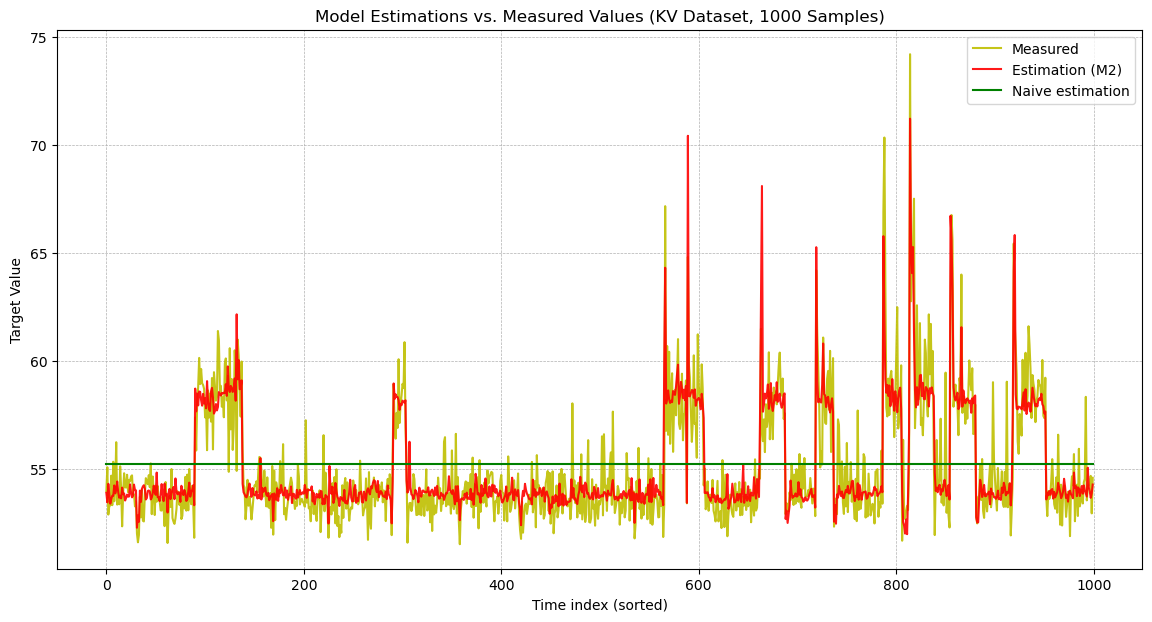

<class 'pandas.core.frame.DataFrame'> <class 'numpy.ndarray'>


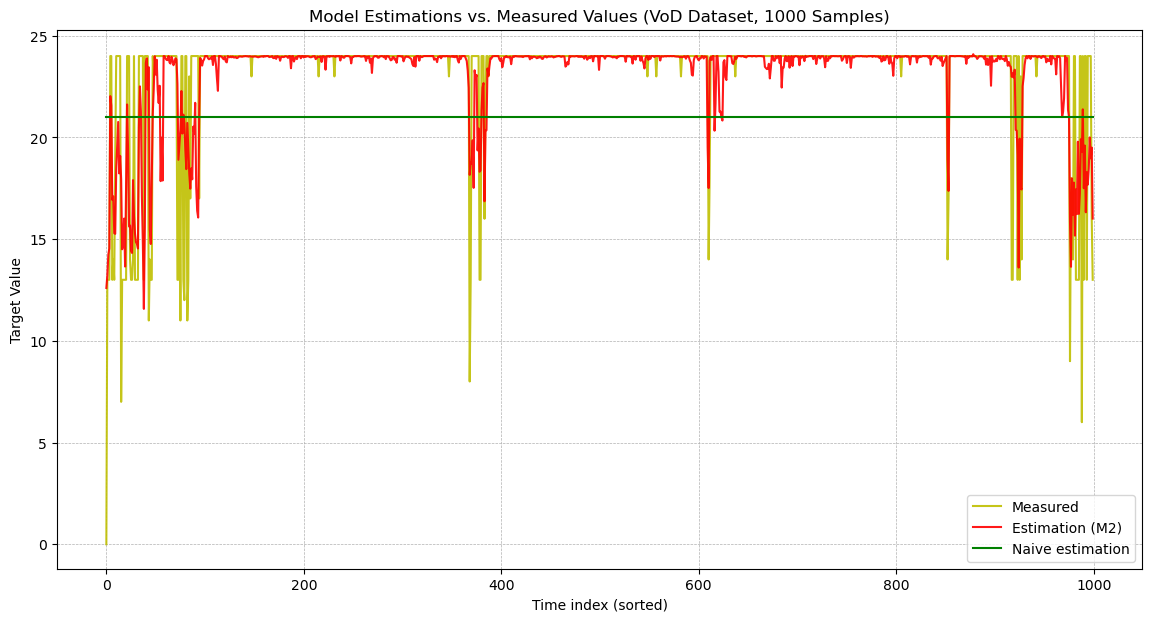

In [47]:
# 5. TIME SERIES PLOT (1000 samples from test set)

print("\nGenerating Time Series Plots...")

# Loop through both datasets to create a plot for each
for name, (X_train, y_train, X_test, y_test) in datasets.items():
    print(type(X_test), type(y_test))

    # Get the predictions from your best-chosen model (M2 Random Forest)
    best_model = M2_models[name]
    model_preds = best_model.predict(X_test)
    # Get the naive predictions (calculated in the previous cell)
    naive_preds = naive_predictions[name]
    # Re-align all data to its original time stamp (index)
    plot_df = pd.DataFrame({
                'Measured': y_test,
                'Estimation (M2)': model_preds,
                'Naive estimation': naive_preds
                }, 
                index=X_test.index)

    # Sort the DataFrame by the index to restore time order 
    plot_df_sorted = plot_df.sort_index()
    
    # Select the first 1000 samples for the plot 
    plot_data_1000 = plot_df_sorted.iloc[:1000]
    
    # Reset index for clean x-axis plotting (0 to 1000)
    plot_data_1000 = plot_data_1000.reset_index(drop=True)

    plt.figure(figsize=(14, 7))
    
    # Plot Measured and Estimation lines
    plt.plot(plot_data_1000['Measured'], label='Measured', color='y', alpha=0.9)
    plt.plot(plot_data_1000['Estimation (M2)'], label='Estimation (M2)', color='r', alpha=0.9)
    # Plot Naive estimation line
    plt.plot(plot_data_1000['Naive estimation'], label='Naive estimation', color='g', linestyle='-')

    plt.title(f"Model Estimations vs. Measured Values ({name} Dataset, 1000 Samples)")
    plt.xlabel("Time index (sorted)")
    plt.ylabel("Target Value")
    plt.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.savefig(f'task2_timeseries_{name}.png', dpi=300)
    plt.show()
    plt.close()

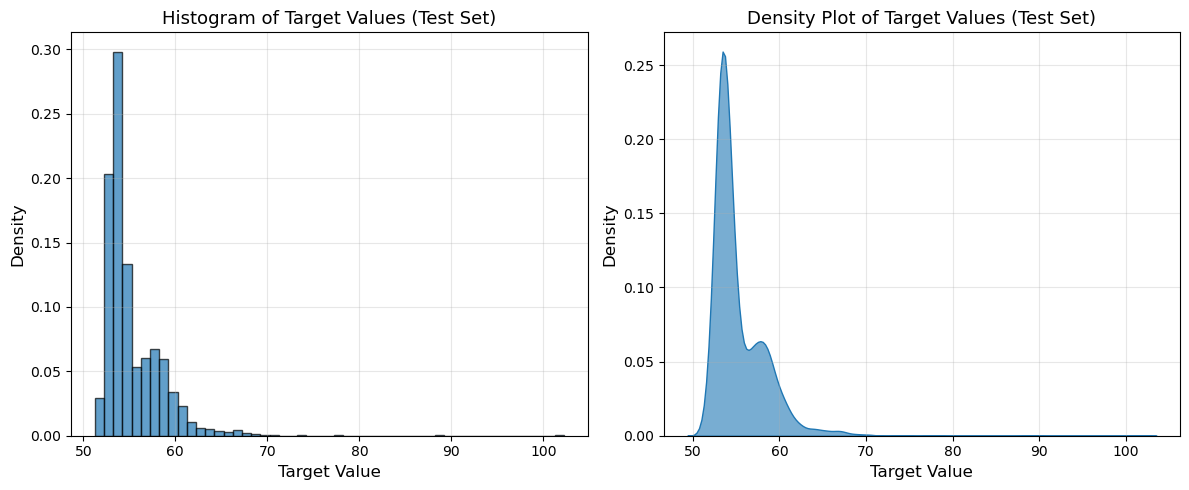

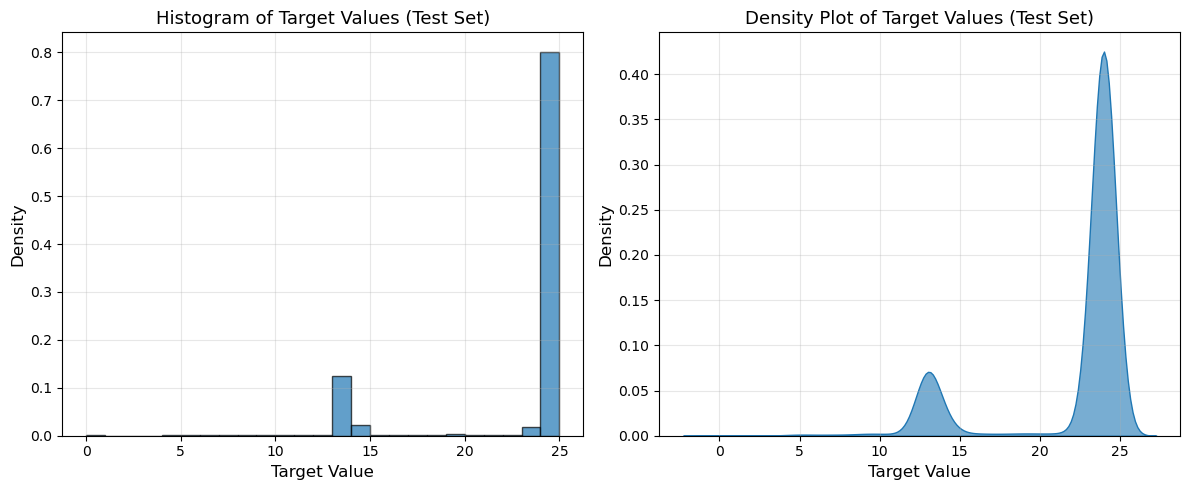

In [48]:
# 6. Density plot and histogram for target values on test set
for name, (X_train, y_train, X_test, y_test) in datasets.items():
    plt.figure(figsize=(12, 5))
    # For VoD (DispFrames): bin_size = 1 frame
    # For KV (ReadsAvg): bin_size = 1 ms
    bin_size = 1
    bins = np.arange(y_test.min(), y_test.max() + bin_size, bin_size)

    plt.subplot(1, 2, 1)
    plt.hist(y_test, bins=bins, alpha=0.7, edgecolor='black', density=True)
    plt.xlabel('Target Value', fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.title('Histogram of Target Values (Test Set)', fontsize=13)
    plt.grid(True, alpha=0.3)

    plt.subplot(1, 2, 2)
    sns.kdeplot(y_test, fill=True, alpha=0.6)
    plt.xlabel('Target Value', fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.title('Density Plot of Target Values (Test Set)', fontsize=13)
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig(f'task2_target_distribution_{name}.png', dpi=300)
    plt.show()
    plt.close()

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


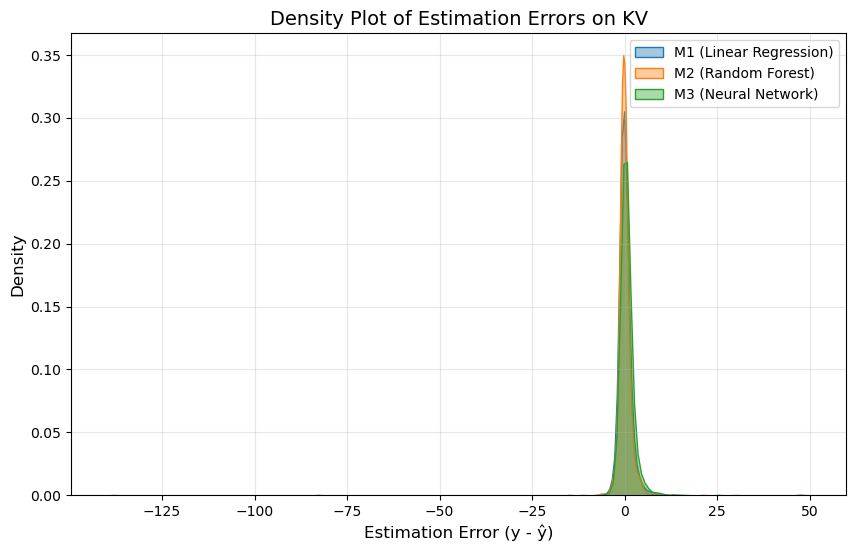


Error Statistics:
M1: Mean=0.017, Std=2.443, Min=-82.680, Max=47.028
M2: Mean=-0.039, Std=1.804, Min=-14.852, Max=47.346
M3: Mean=0.481, Std=3.283, Min=-137.987, Max=48.320
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step


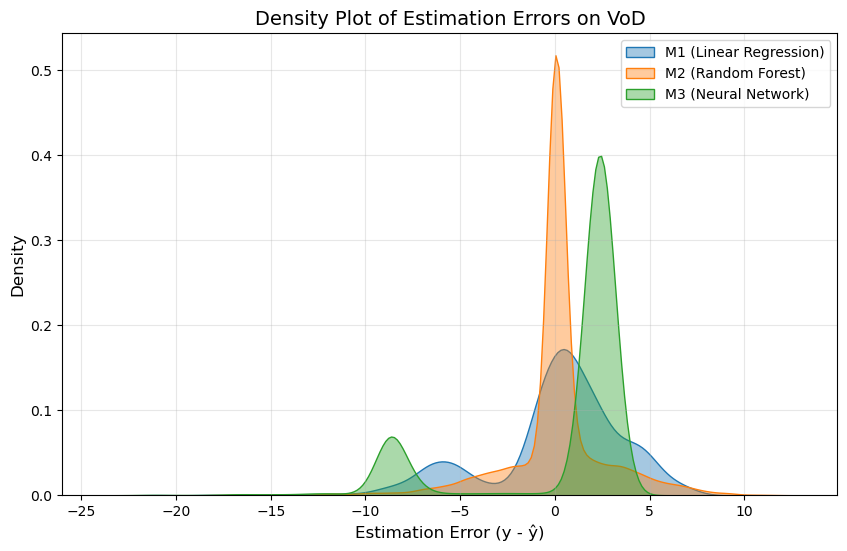


Error Statistics:
M1: Mean=0.097, Std=3.587, Min=-21.069, Max=7.952
M2: Mean=0.094, Std=2.620, Min=-17.940, Max=11.650
M3: Mean=0.434, Std=4.288, Min=-21.838, Max=3.784


In [49]:
# 7. DENSITY PLOT of estimation errors for all models
for name, (X_train, y_train, X_test, y_test) in datasets.items():
    M1_model = M1_models[name]
    M2_model = M2_models[name]
    M3_model = M3_models[name]
    y_pred_M1 = M1_model.predict(X_test)
    y_pred_M2 = M2_model.predict(X_test)
    y_pred_M3 = M3_model.predict(X_test).flatten()
    error_M1 = y_test - y_pred_M1
    error_M2 = y_test - y_pred_M2
    error_M3 = y_test - y_pred_M3

    plt.figure(figsize=(10, 6))
    sns.kdeplot(error_M1, label='M1 (Linear Regression)', fill=True, alpha=0.4) #
    sns.kdeplot(error_M2, label='M2 (Random Forest)', fill=True, alpha=0.4) #
    sns.kdeplot(error_M3, label='M3 (Neural Network)', fill=True, alpha=0.4) #
    plt.xlabel('Estimation Error (y - ŷ)', fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.title(f'Density Plot of Estimation Errors on {name}', fontsize=14)
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    # plt.axvline(x=0, color='red', linestyle='--', linewidth=1, alpha=0.7)
    # plt.tight_layout()
    plt.savefig(f'task2_error_density_{name}.png', dpi=300)
    plt.show()

    # Error statistics
    print("\nError Statistics:")
    for model, errors in [('M1', error_M1), ('M2', error_M2), ('M3', error_M3)]:
        print(f"{model}: Mean={np.mean(errors):.3f}, Std={np.std(errors):.3f}, "
            f"Min={np.min(errors):.3f}, Max={np.max(errors):.3f}")

In [50]:
# ============================================================
# 8. SUMMARY COMPARISON
# ============================================================
for name in datasets.keys():
    print("\n" + "="*60)
    print(f"SUMMARY: Model Comparison of {name}")
    print("="*60)
    print(f"{'Model':<25} {'NMAE':<12} {'Training Time (s)':<20}")
    print("-"*60)
    print(f"{'Linear Regression':<25} {M1_nmae_scores[name]:<12.3f} {M1_training_times[name]:<20.3f}")
    print(f"{'Random Forest':<25} {M2_nmae_scores[name]:<12.3f} {M2_training_times[name]:<20.3f}")
    print(f"{'Neural Network':<25} {M3_nmae_scores[name]:<12.3f} {M3_training_times[name]:<20.3f}")
    print(f"{'Naive Baseline':<25} {naive_nmae_scores[name]:<12.3f} {'N/A':<20}")
    print("="*60)




SUMMARY: Model Comparison of KV
Model                     NMAE         Training Time (s)   
------------------------------------------------------------
Linear Regression         0.021        0.006               
Random Forest             0.019        1.155               
Neural Network            0.023        842.956             
Naive Baseline            0.041        N/A                 

SUMMARY: Model Comparison of VoD
Model                     NMAE         Training Time (s)   
------------------------------------------------------------
Linear Regression         0.119        0.009               
Random Forest             0.062        2.005               
Neural Network            0.157        734.021             
Naive Baseline            0.174        N/A                 
